<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
Joshua Henderson
  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

In [8]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

### Reading the Data

In [9]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/Assignment 5/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/Assignment 5/landsat_test.csv')

### Statistical and Visual Exploration

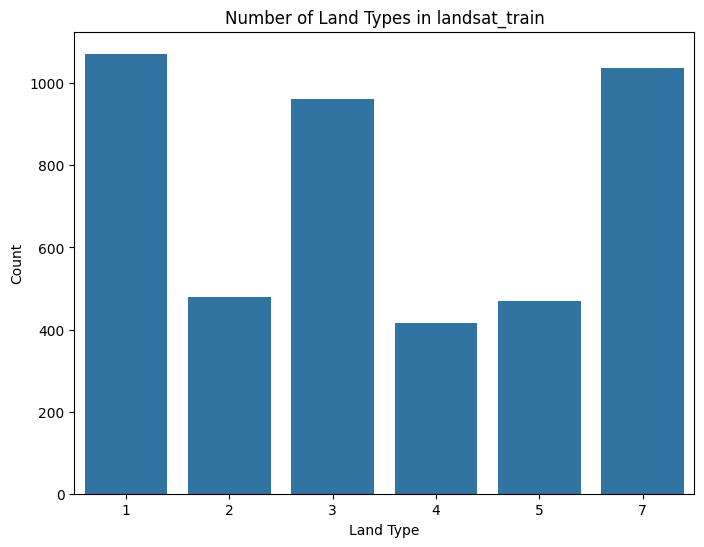

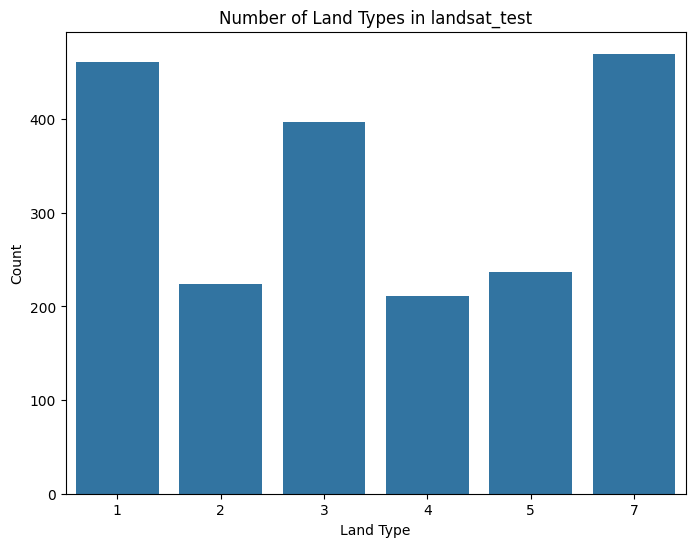

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='land_type', data=landsat_train)  # Change 'landtype' to the correct column name
plt.title('Number of Land Types in landsat_train')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='land_type', data=landsat_test)  # Change 'landtype' to the correct column name
plt.title('Number of Land Types in landsat_test')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.show()

### Splitting Data into Train/Test

In [12]:

X_train = landsat_train.drop('land_type', axis=1)
X_test = landsat_test.drop('land_type', axis=1)
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

### Building the Pipeline

In [16]:

numerical_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(exclude=['number']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

### Executing the Model

In [17]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

### Evaluating Model

Precision: [0.97649573 0.96888889 0.88811189 0.80745342 0.92070485 0.86938776]
Recall: [0.99132321 0.97321429 0.95969773 0.61611374 0.88185654 0.90638298]
F1 Score: [0.98385361 0.97104677 0.92251816 0.69892473 0.90086207 0.8875    ]


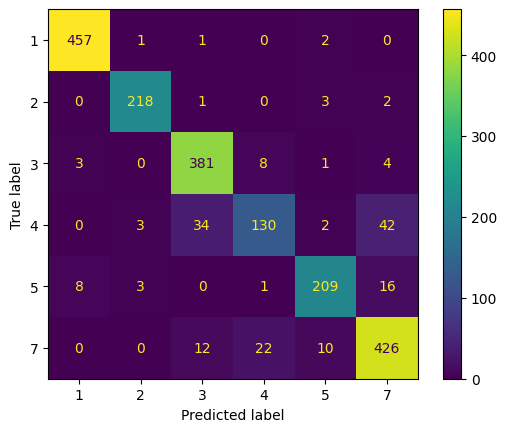

In [20]:

def classification_function(y_test, y_pred):
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

classification_function(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

### Conclusion
Write a general conclusion about the results of your model.

In [ ]:
# The RandomForestClassifier model demonstrates reasonable per0formance in predicting land type, as indicated by the confusion matrix and classification metrics (precision, recall, F1-score).

## Problem 2

### Executing the Model

Precision: [0.96788009 0.96888889 0.86666667 0.66145833 0.91324201 0.85744235]
Recall: [0.98047722 0.97321429 0.91687657 0.60189573 0.84388186 0.87021277]
F1 Score: [0.97413793 0.97104677 0.89106487 0.63027295 0.87719298 0.86378036]


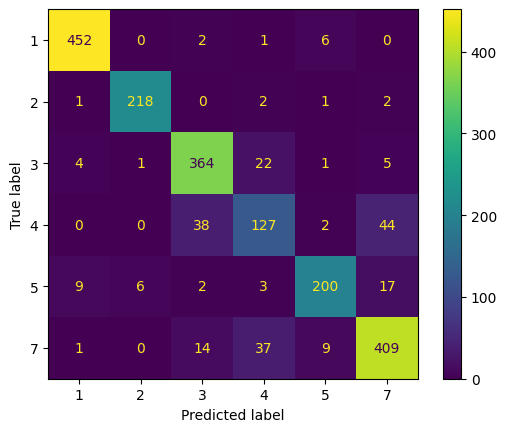

In [21]:

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier())
])

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

classification_function(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

### Conclusion
Write a general conclusion about the results of your model.

In [ ]:
# The BaggingClassifier model demonstrates reasonable performance in predicting land type, as indicated by the confusion matrix and classification metrics (precision, recall, F1-score).


Problem 1

In [25]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Assignment 5/banknote_authentication (2).csv')

In [26]:
X = df.drop(columns=['forgery'])
y = df['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Precision: [0.98666667 1.        ]
Recall: [1.         0.98425197]
F1 Score: [0.99328859 0.99206349]


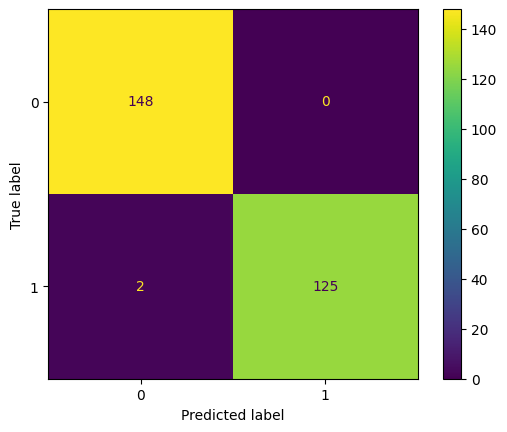

In [27]:

numerical_features = X_train.select_dtypes(include=['number']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


classification_function(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

In [28]:

#The RandomForestClassifier demonstrates strong performance in banknote authentication, achieving high precision, recall, and F1-score, as evidenced by the confusion matrix and classification report.

